# 0. 논문에서 모든 데이터 처리는 Python 및 관련 과학 라이브러리, pandas 및 scikit-learn으로 수행됨

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import f1_score

##### 사용한 모델은 logisitc regression, randomforest, xgboost임으로 사용을 위해 불러왔다.

# 1. 데이터 불러오기 [구조화된 데이터](https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv)

In [2]:
structured_data = pd.read_csv("C:/Users/ba874/Desktop/OCL/study/dataset/paper/heart.csv")

age : 환자의 나이  
gender : 환자의 성별  
exang : 운동으로 인한 협심증 (1 = 예, 0 = 아니오) //협심증 : 가슴이 좁아진 듯 조이고 뻐근한 통증  
ca : 주요 혈관수 (0-2)  
cp : 가슴 통중 종류 (1 = 전형적인 협심증, 2 = 비정형 협심증, 3 = 비 협심증 통증, 4 = 무증상)  
trtbps : 안정시 혈압 (단위 : mm Hg)  
chol : BMI 센서를 통해 가져온 cholestoral (mg/dl)  
fbs : 공복 혈당이 120 mg/dl 초과면 1, 아니면 0  
rest_ecg : 휴식 심전도 결과 (0 = 보통, 1 = ST-T파 이상(T 파 반전 및 / 또는 ST 상승 또는 감소> 0.05mV), 2 = Estes의 기준에 따라 가능한 또는 확실한 좌심실 비대 표시)  
thalachh : 최대 심박수  
output : 0 = 심장 마비 확률 감소, 1 = 심장 마비 확률 증가

In [3]:
structured_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
structured_data["age"].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [5]:
structured_data["trtbps"].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trtbps, dtype: float64

In [6]:
structured_data["thalachh"].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalachh, dtype: float64

In [7]:
structured_data["chol"].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

In [8]:
import sklearn

In [9]:
df = sklearn.utils.shuffle(structured_data)

In [10]:
x = df[df.columns.difference(["output"])]

In [11]:
train_data = x.iloc[:202]

In [12]:
test_data = x.iloc[202:]

In [13]:
y = df["output"]

In [14]:
y.sum()

165

In [15]:
train_label = y.iloc[:202]
test_label = y.iloc[202:]

In [16]:
train_label.sum()

105

In [17]:
LR_st = LogisticRegression()

[sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)에 따르면 logistic regression penalty의 default가 l2여서 따로 설정하지 않겠다.

In [18]:
LR_st.fit(train_data, train_label)

C:\Users\ba874\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_predict = LR_st.predict(test_data)

In [20]:
f1_score(test_label, y_predict)

0.8461538461538461

In [21]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score

In [22]:
accuracy_score(test_label, y_predict)

0.801980198019802

In [23]:
recall_score(test_label, y_predict)

0.9166666666666666

In [24]:
precision_score(test_label, y_predict)

0.7857142857142857

In [25]:
from sklearn.metrics import roc_curve

In [26]:
fpr, tpr, thresholds = roc_curve(test_label, y_predict)

In [27]:
import matplotlib.pyplot as plt

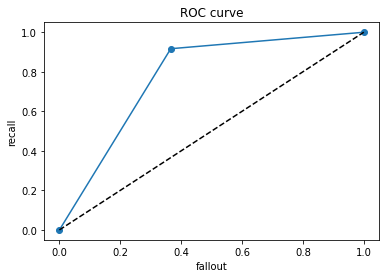

In [28]:
plt.plot(fpr, tpr, 'o-', label="ROC Curve")
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("fallout")
plt.ylabel("recall")
plt.title("ROC curve")
plt.show()

In [29]:
from sklearn.metrics import auc

In [30]:
auc(fpr, tpr)

0.7754065040650406

랜포 모델 구현

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns.difference(["output"])], df["output"], test_size = 0.3)

In [33]:
RF_st = RandomForestClassifier()

In [34]:
RF_st.fit(x_train, y_train)

RandomForestClassifier()

In [35]:
y_pred = RF_st.predict(x_test)

In [36]:
accuracy_score(y_test, y_pred)

0.7582417582417582

In [37]:
recall_score(y_test, y_pred)

0.8070175438596491

In [38]:
precision_score(y_test, y_pred)

0.8070175438596491

In [39]:
f1_score(y_test, y_pred)

0.8070175438596491

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

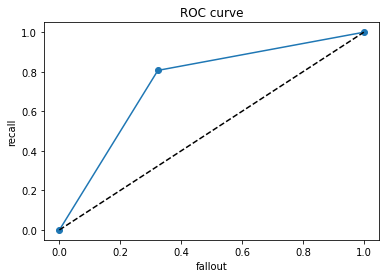

In [41]:
plt.clf()
plt.plot(fpr, tpr, 'o-', label="ROC Curve")
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("fallout")
plt.ylabel("recall")
plt.title("ROC curve")
plt.show()

In [42]:
auc(fpr, tpr)

0.7417440660474717

xgboost

In [43]:
xgb_rf = xgb.XGBClassifier()

In [44]:
xgb_rf.fit(x_train, y_train)

[23:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ba874\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
pred = xgb_rf.predict(x_test)

In [46]:
accuracy_score(y_test, pred)

0.7802197802197802

In [47]:
recall_score(y_test, pred)

0.8421052631578947

In [48]:
precision_score(y_test, pred)

0.8135593220338984

In [49]:
f1_score(y_test, pred)

0.8275862068965518

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc(fpr, tpr)

0.7592879256965944

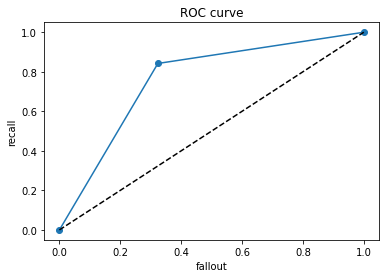

In [51]:
plt.clf()
plt.plot(fpr, tpr, 'o-', label="ROC Curve")
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("fallout")
plt.ylabel("recall")
plt.title("ROC curve")
plt.show()